# Dynamic Programming

Grundprinzipien von Dynamischem Programmieren (DP)
1. Optimale Teilstruktur
Eine optimale Lösung enthält optimale Lösungen von Teilproblemen.

2. Überlappende Teilprobleme
Viele Teilprobleme tauchen mehrfach auf → vermeide doppelte Berechnungen!

3. Tabellenspeicherung (Memoisierung)
Zwischenergebnisse werden gespeichert, entweder:

    - Bottom-up: Iterativ (z.B. Fibonacci mit Schleife)

    - Top-down: Rekursiv mit Cache

## Climbing Stairs

https://leetcode.com/problems/climbing-stairs/description/

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

Example 1:

Input: n = 2
Output: 2
Explanation: There are two ways to climb to the top.
1. 1 step + 1 step
2. 2 steps

In [7]:
def climbStairs(n):
    if n <= 2:
        return n
    prev1, prev2 = 2, 1
    for i in range(3, n+1):
        curr = prev1 + prev2
        prev2 = prev1
        prev1 = curr
    return prev1

climbStairs(5)

def climbStairs2(n):
    dp = [0] * (n+1)
    dp[0] = dp[1] = 1
    for i in range(2, n+1):
        dp[i] = dp[i-1] + dp[i-2]
    print(dp)
    return dp[n]

climbStairs2(10)


[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


89

## Min COst Climbing Stairs

https://leetcode.com/problems/min-cost-climbing-stairs/description/

You are given an integer array cost where cost[i] is the cost of ith step on a staircase. Once you pay the cost, you can either climb one or two steps.

You can either start from the step with index 0, or the step with index 1.

Return the minimum cost to reach the top of the floor.

Example 1:

Input: cost = [10,15,20]
Output: 15
Explanation: You will start at index 1.
- Pay 15 and climb two steps to reach the top.
The total cost is 15.

Example 2:

Input: cost = [1,100,1,1,1,100,1,1,100,1]
Output: 6
Explanation: You will start at index 0.
- Pay 1 and climb two steps to reach index 2.
- Pay 1 and climb two steps to reach index 4.
- Pay 1 and climb two steps to reach index 6.
- Pay 1 and climb one step to reach index 7.
- Pay 1 and climb two steps to reach index 9.
- Pay 1 and climb one step to reach the top.
The total cost is 6.

In [10]:
cost = [1,100,1,1,1,100,1,1,100,1]

def minCostClimbingStairs(cost):
    n = len(cost)
    dp = [0] * (n+1)

    # Basisfälle beide 0, der erste Sprung kostet nichts. Man zahlt immer wenn man auf einer Stufe landet
    dp[0] = dp[1] = 0

    for i in range(2, n + 1):
        dp[i] = min(dp[i-1] + cost[i-1],    # Kosten um von der vorherigen stufe auf die jetzige zu kommen
                    dp[i-2] + cost[i-2])    # Kosten um von 2 stufen davor auf die jetzige zu kommen

    print(dp)
    return dp[n]

minCostClimbingStairs(cost)

[0, 0, 1, 2, 2, 3, 3, 4, 4, 5, 6]


6

Bei Bottom-up muss man nie an die zukünftigen Schritte denken. Es wird immer basierend auf der Vergangenheit entschieden, also auf schon berechneten Werten.

## House Robber

https://leetcode.com/problems/house-robber/description/

You are a professional robber planning to rob houses along a street. Each house has a certain amount of money stashed, the only constraint stopping you from robbing each of them is that adjacent houses have security systems connected and it will automatically contact the police if two adjacent houses were broken into on the same night.

Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police.

Example 1:

Input: nums = [1,2,3,1]
Output: 4
Explanation: Rob house 1 (money = 1) and then rob house 3 (money = 3).
Total amount you can rob = 1 + 3 = 4.

Example 2:

Input: nums = [2,7,9,3,1]
Output: 12
Explanation: Rob house 1 (money = 2), rob house 3 (money = 9) and rob house 5 (money = 1).
Total amount you can rob = 2 + 9 + 1 = 12.

In [20]:
nums = [1,2,3,1]

def rob(amounts):
    if not amounts:
        return 0
    if len(amounts) == 1:
        return amounts[0]

    dp = [0] * len(amounts)

    dp[0] = amounts[0]
    dp[1] = max(amounts[0], amounts[1])

    for i in range(2, len(amounts)):
        dp[i] = max(amounts[i] + dp[i-2], dp[i-1])

    print(dp)
    return dp[-1]

rob(nums)

[3, 3, 4, 4]


4

## Minimum Path Sum

https://leetcode.com/problems/minimum-path-sum/description/

Given a m x n grid filled with non-negative numbers, find a path from top left to bottom right, which minimizes the sum of all numbers along its path.

Note: You can only move either down or right at any point in time.

Example 1:

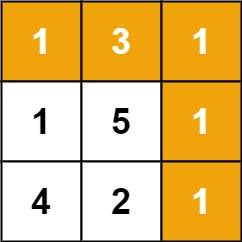

Input: grid = [[1,3,1],[1,5,1],[4,2,1]]
Output: 7
Explanation: Because the path 1 → 3 → 1 → 1 → 1 minimizes the sum.

In [21]:
grid = [[1,3,1],[1,5,1],[4,2,1]]
def minPathSum(grid):
    m = len(grid)
    n = len(grid[0])
    dp = [[0] * n for _ in range(m)]

    dp[0][0] = grid[0][0]
    # Zuerst Randfälle behandeln (1. Zeile und Spalte)
    for i in range(1, m):
        dp[i][0] = dp[i-1][0] + grid[i][0]

    for j in range(1, n):
        dp[0][j] = dp[0][j-1] + grid[0][j]

    for i in range(1, m):
        for j in range(1, n):
            # Wir kommen entweder von links oder von oben und suchen davon das min aus
            dp[i][j] = min(dp[i-1][j], dp[i][j-1]) + grid[i][j]
    print(dp)
    return dp[m-1][n-1]

minPathSum(grid)

[[1, 4, 5], [2, 7, 6], [6, 8, 7]]


7

## Unique Paths

There is a robot on an m x n grid. The robot is initially located at the top-left corner (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). The robot can only move either down or right at any point in time.

Given the two integers m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.

The test cases are generated so that the answer will be less than or equal to 2 * 109.

Example 1:

Input: m = 3, n = 7
Output: 28

In [22]:
def uniquePaths(m, n):
    dp = [[0] * n for _ in range(m)]

    # Es gibt nur einen weg ins erste feld
    dp[0][0] = 1

    # nur nach unten/rechts gibt es auch jeweils nur einen weg
    for i in range(1, m):
        dp[i][0] = 1

    for j in range(1, n):
        dp[0][j] = 1

    for i in range(1, m):
        for j in range(1, n):
            # Anzahl wege = Anzahl wege links + Anzahl wege oben
            dp[i][j] = dp[i][j-1] + dp[i-1][j]
    return dp[m-1][n-1]

uniquePaths(3,7)

28

## Klausuraufgabe Zahlendreieck



In [28]:
triangle = [
    [10, -1, -1, -1, -1, -1, -1],
    [82, 81, -1, -1, -1, -1, -1],
    [4, 6, 10, -1, -1, -1, -1],
    [2, 14, 35, 7, -1, -1, -1],
    [41, 3, 52, 26, 15, -1, -1],
    [32, 90, 11, 87, 56, 23, -1],
    [54, 65, 89, 32, 71, 9, 31]
]

def solve(triangle):
    m = n = len(triangle) #geht aus Aufgabe hervor dass m= n

    dp = [[0] * n for _ in range(n)]

    dp[0][0] = triangle[0][0]
    print(dp[0][0])

    for i in range(1, n):
        dp[i][0] = dp[i-1][0] + triangle[i][0]

    for i in range(1, n):
        for j in range(1, n):
            if dp[i][j] == -1:
                break
            dp[i][j] = max(dp[i-1][j-1], dp[i-1][j]) + triangle[i][j]

    print(dp)
    return max(dp[n-1])

solve(triangle)

10
[[10, 0, 0, 0, 0, 0, 0], [92, 91, -1, -1, -1, -1, -1], [96, 98, 101, -2, -2, -2, -2], [98, 112, 136, 108, -3, -3, -3], [139, 115, 188, 162, 123, -4, -4], [171, 229, 199, 275, 218, 146, -5], [225, 294, 318, 307, 346, 227, 177]]


346

## Klausuraufgabe Catalan Zahlen

Entwerfen Sie ein dynamisches Programm, das die folgenden rekursiv definieren
Catalan-Zahlen berechnet




In [36]:
def catalan(N):
    C = [0] * (N +1)

    C[0] = 1

    for n in range(1, N +1):
        for k in range(n):
            C[n] += C[k] * C[n - 1 - k]
    return C[N]

catalan(5)

42

## Klassisches 0/1 Knapsack Problem

Gegeben sind:

- Ein Array weights mit den Gewichten der Gegenstände

- Ein Array values mit den zugehörigen Werten

- Eine Kapazität W (Maximalgewicht des Rucksacks)

Du darfst jeden Gegenstand höchstens einmal wählen.
Finde den maximalen Gesamtwert, den du in den Rucksack packen kannst, ohne das Gewicht W zu überschreiten.

In [37]:
weights = [2, 3, 4, 5]
values =  [3, 4, 5, 6]
W = 5

def knapSack(weights, values, W):
    n = len(weights)
    dp = [[0] * (W + 1) for _ in range(n + 1)]  # Matrix mit Dimensionen Anzahl gegenstände x Gewicht

    # Basiswerte sind schon alle auf 0 gesetzt

    for gegenstand in range(1, n+1):
        for gewicht in range(W + 1):
            if weights[gegenstand-1] <= gewicht:
                dp[gegenstand][gewicht] = max(dp[gegenstand - 1][gewicht],
                                              values[gegenstand-1] + dp[gegenstand - 1][gewicht - weights[gegenstand - 1]])
            else:
                dp[gegenstand][gewicht] = dp[gegenstand - 1][gewicht]
    return dp[n][W]

knapSack(weights, values, W)

7

scheiß kopffick bitte komm nicht dran